In [35]:
import numpy as np
import random
#import multiprocessing
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


def hardselect(M,n,p):
    size = int(np.floor(n*p))
    v = np.array(range(0,n))
    degree_seq = np.array(np.sum(M, axis = 1)[0:n])
    nontaboo_degree_max = np.sort(degree_seq)[(n-1-size)]
    taboo = degree_seq[degree_seq > nontaboo_degree_max]
    return taboo
    

def softselect(M,n,p):
    size = int(np.floor(n*p))
    v = np.array(range(0,n))
    grand_prob = np.sum(M, axis = 1)
    prob_vec = grand_prob[0:n]/np.sum(grand_prob[0:n])
    taboo = np.random.choice(v, size = size, replace = False, p = prob_vec) #? check function
    return taboo

def simulate_graph_maximal_hardselect(N,p):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    for i in range(2,N):
        taboo = hardselect(M,i, p)
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = 1)
        M[i, edge_end] = 1
        M[edge_end, i] = 1
    
    #deg_seq = np.sum(M, axis = 1)
    max_deg = max(np.sum(M, axis = 1))

    return max_deg

def simulate_graph_maximal_softselect(N,p):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    for i in range(2,N):
        taboo = softselect(M,i, p)
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = 1)
        M[i, edge_end] = 1
        M[edge_end, i] = 1
    
    #deg_seq = np.sum(M, axis = 1)
    max_deg = max(np.sum(M, axis = 1))

    return max_deg

def simulate_graph_seq_hardselect(N,p,k):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    for i in range(2,N):
        taboo = hardselect(M,i, p)
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = 1)
        M[i, edge_end] = 1
        M[edge_end, i] = 1
    
    deg_seq = np.sum(M, axis = 1)
    number_of_vertex = np.count_nonzero(deg_seq == k)

    return number_of_vertex

def simulate_graph_seq_softselect(N,p,k):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    for i in range(2,N):
        taboo = softselect(M,i, p)
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = 1)
        M[i, edge_end] = 1
        M[edge_end, i] = 1
    
    deg_seq = np.sum(M, axis = 1)
    number_of_vertex = np.count_nonzero(deg_seq == k)

    return number_of_vertex

def maximal_plot_hardselect(N,p,S):
    #num_cores = multiprocessing.cpu_count()
    inputs = range(0,S)

    mylist = []
    mylist = Parallel(n_jobs = -1)(delayed(simulate_graph_maximal_hardselect)(N,p) for i in inputs)
    plt.figure(figsize = (12,6),facecolor='whitesmoke')
    plt.hist(mylist, density = True)
    titlename = f"Maximal degree distribution in Graph of size {N} and p={p} -- Hardcoded taboo : Number of iter = {S}"
    filename = titlename + ".png"
    plt.title(titlename)
    plt.savefig(fname = filename, dpi = 600)
    return np.mean(mylist), np.var(mylist)

def maximal_plot_softselect(N,p,S):
    #num_cores = multiprocessing.cpu_count()
    inputs = range(0,S)

    mylist = []
    mylist = Parallel(n_jobs = -1)(delayed(simulate_graph_maximal_softselect)(N,p) for i in inputs)
    plt.figure(figsize = (12,6), facecolor = 'whitesmoke')
    plt.hist(mylist, density = True)
    titlename = f"Maximal degree distribution in Graph of size {N} and p={p} -- Softcoded taboo : Number of iter = {S}"
    filename = titlename + ".png"
    plt.title(titlename)
    plt.savefig(fname = filename, dpi = 600)
    return mylist

def degree_seq_plot_hardselect(N,p,k,S):
    inputs = range(0,S)

    mylist = []
    mylist = Parallel(n_jobs = -1)(delayed(simulate_graph_seq_hardselect)(N,p,k) for i in inputs)
    plt.figure(figsize = (12,6), facecolor = 'whitesmoke')
    plt.hist(mylist, density = True)
    titlename = f"Distribution of number of {k}-degree vertices in Graph of size {N} and p={p} -- Hardcoded taboo : Number of iter = {S}"
    filename = titlename + ".png"
    plt.title(titlename)
    plt.savefig(fname = filename, dpi = 600)
    return mylist

def degree_seq_plot_softselect(N,p,k,S):
    inputs = range(0,S)

    mylist = []
    mylist = Parallel(n_jobs = -1)(delayed(simulate_graph_seq_softselect)(N,p,k) for i in inputs)
    plt.figure(figsize = (12,6), facecolor = 'whitesmoke')
    plt.hist(mylist, density = True)
    titlename = f"Distribution of number of {k}-degree vertices in Graph of size {N} and p={p} -- Softcoded taboo : Number of iter = {S}"
    filename = titlename + ".png"
    plt.title(titlename)
    plt.savefig(fname = filename, dpi = 600)
    return mylist

CPU times: user 5.78 s, sys: 446 ms, total: 6.23 s
Wall time: 3min 4s


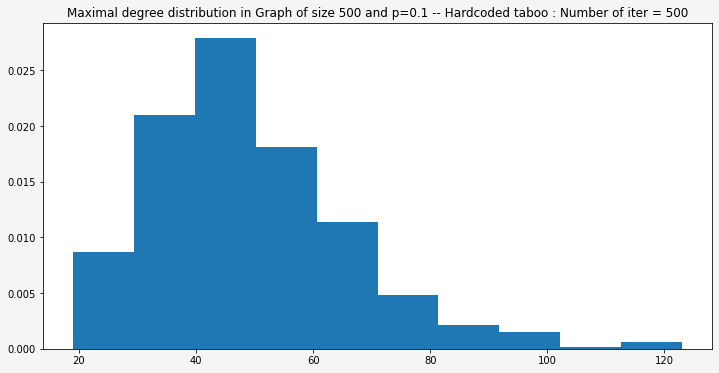

In [36]:
%%time
x1 = maximal_plot_hardselect(500, .1, 500)

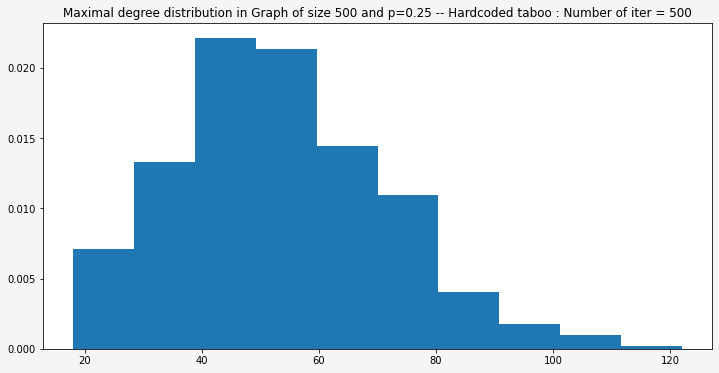

In [38]:
x12 = maximal_plot_hardselect(500,.25,500)

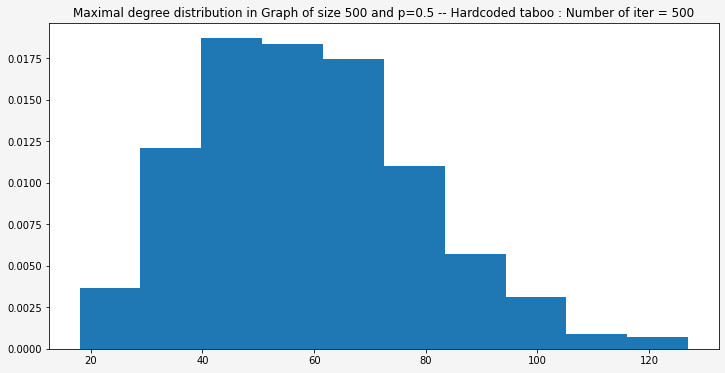

In [39]:
x13 = maximal_plot_hardselect(500,.5,500)

In [ ]:
x14 = maximal_plot_hardselect(500,.75,500)

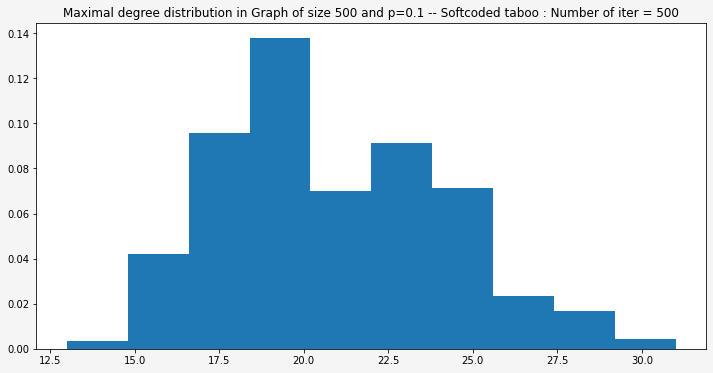

In [37]:
x2 = maximal_plot_softselect(500,.1,500)

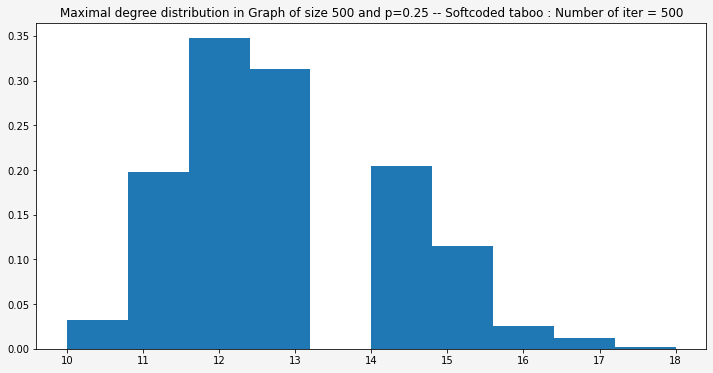

In [40]:
x22 = maximal_plot_softselect(500,.25,500)

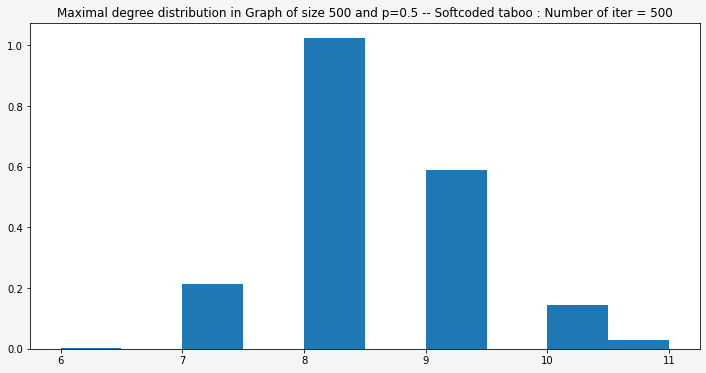

In [41]:
x23 = maximal_plot_softselect(500,.5,500)

In [ ]:
x24 = maximal_plot_softselect(500, .75, 500)

In [48]:
np.unique(np.array(x23))

array([ 6,  7,  8,  9, 10, 11])

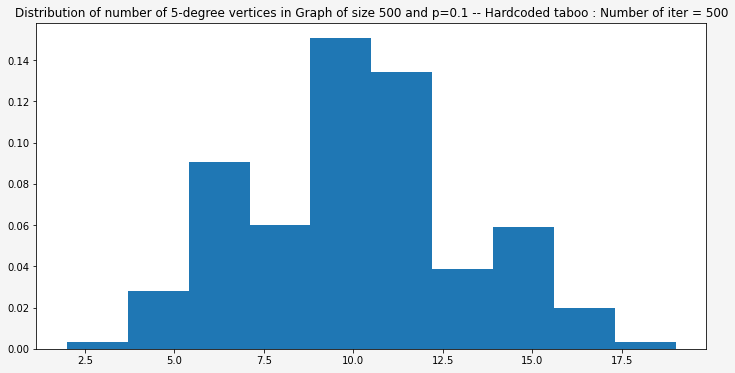

In [42]:
x3 = degree_seq_plot_hardselect(500,.1,5,500)

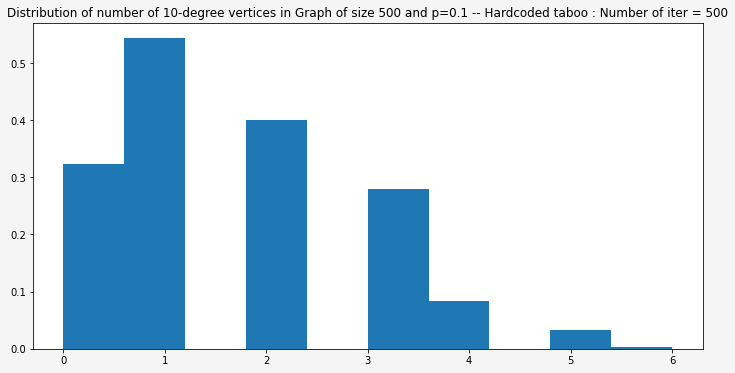

In [43]:
x4 = degree_seq_plot_hardselect(500,.1,10,500)

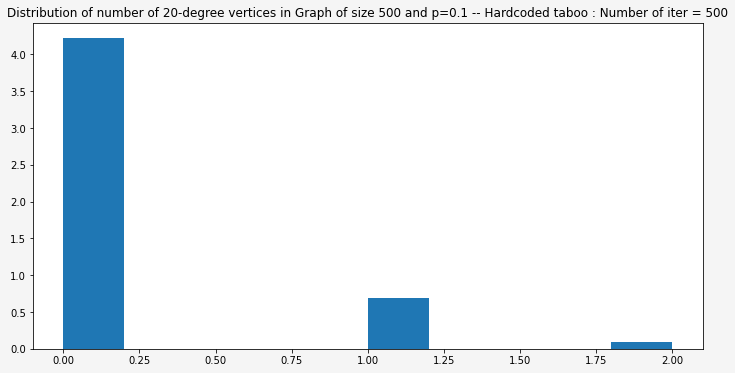

In [44]:
x5 = degree_seq_plot_hardselect(500,.1,20,500)

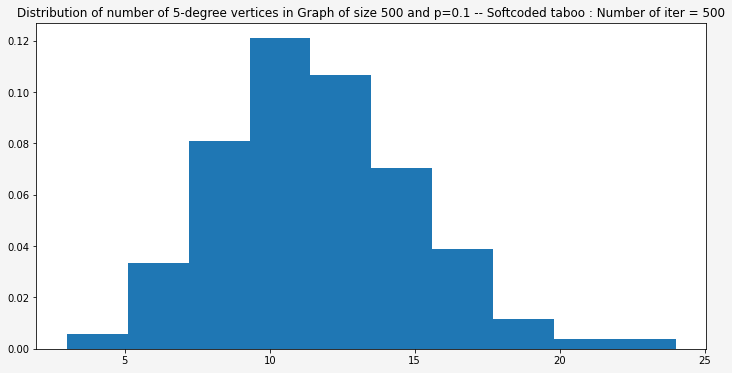

In [45]:
x6 = degree_seq_plot_softselect(500,.1,5,500)

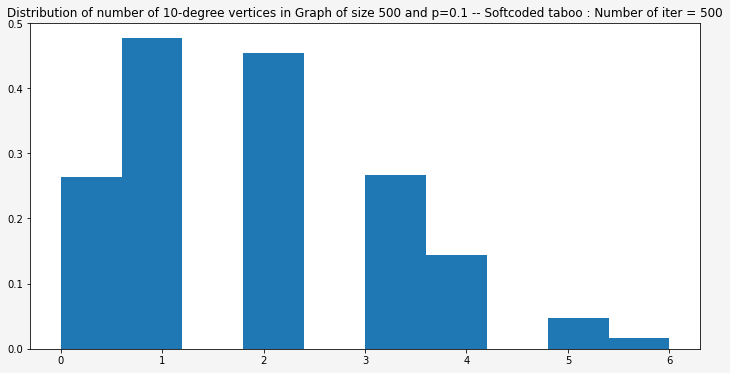

In [46]:
x7 = degree_seq_plot_softselect(500,.1,10,500)

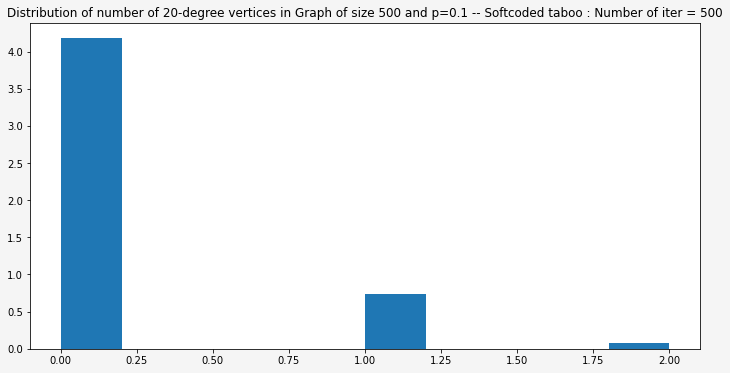

In [47]:
x8 = degree_seq_plot_softselect(500,.1,20,500)